Autor: Aleš Zorman, Janko Slavič

In [3]:
import sys, os
my_path = os.path.abspath('')
sys.path.insert(0, my_path + '/../')

import numpy as np
import pyExSi as es
import FLife
import matplotlib
import matplotlib.pyplot as plt
import sympy as sym
from IPython.core.display import SVG
from IPython.display import Audio, display
from scipy import signal
from scipy.fft import fft, fftshift
from scipy import stats

In [2]:
%matplotlib inline

font_size = 15
fig_size = (8.0, 3.0)

plt.style.use('default')
plt.style.use('ggplot')


matplotlib.rcParams['figure.figsize'] = fig_size
matplotlib.rcParams['font.size'] = font_size

# oknjenje

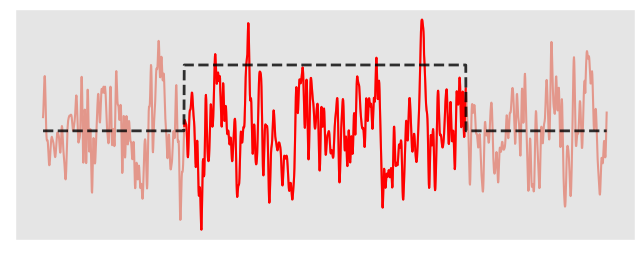

In [72]:
# Get real data, contaminated with noise
data = np.load(os.path.join('.\\data\\m1.npy'))

time = data[::2][: int(3e6 + 1)] # time , 300 s
time_history = data[1::2][: int(3e6 + 1)] # time_history
time_history /= np.std(time_history)

dt = time[1] - time[0]
fs = 1/dt
N = len(time_history)

wp = np.zeros_like(time)
Tp = .1
zamik = 1*Tp
wp_indx = np.abs(time-zamik) < Tp/2
wp[wp_indx] = 2
t_indx = np.logical_and(time>=0, time<=.2)

plt.plot(time[t_indx], time_history[t_indx], alpha=.5)
plt.plot(time[wp_indx], time_history[wp_indx], color='red')
plt.plot(time[t_indx], wp[t_indx], 'k--', lw=2, alpha=.8)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
#plt.savefig('windowing.pdf', bbox_inches='tight')

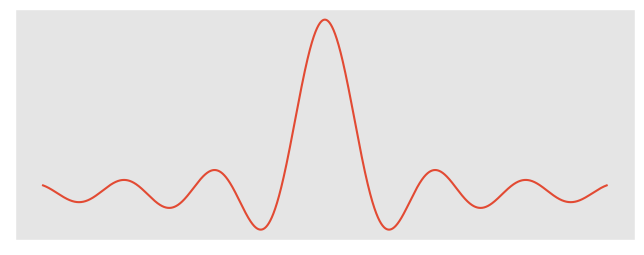

In [81]:
# še sinc funkcijo
A = 1
T = 1
fT_theor = np.arange(-2,2,0.0001)
Wp_theor2 = A*T* np.sinc(np.pi*fT_theor)

plt.plot(fT_theor, Wp_theor2)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
#plt.savefig('windowing_freq.pdf', bbox_inches='tight')

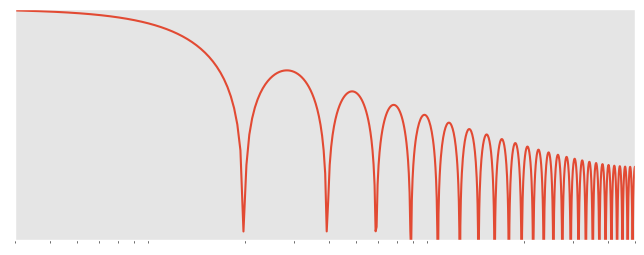

In [135]:
window = signal.windows.boxcar(51)

A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.semilogx(freq, response)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.axis([0.003, 0.5, -50, 0])
#plt.savefig('windowing_characteristics.pdf', bbox_inches='tight')

# vzorcenje, DFT ...

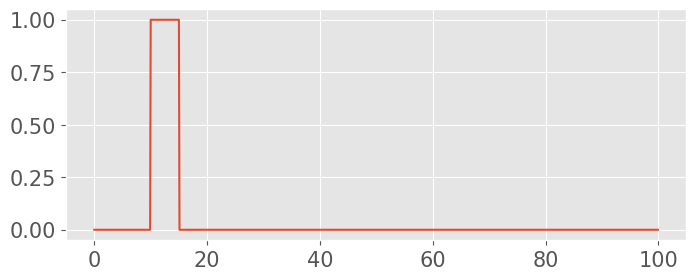

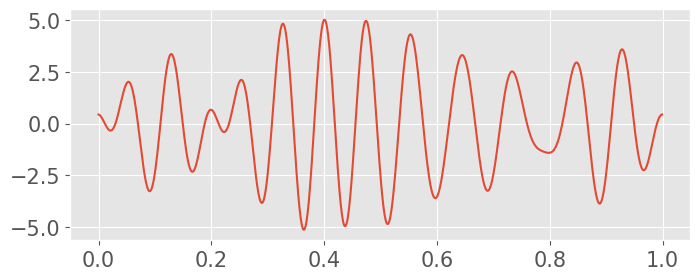

In [177]:
# narrowband signal

freq = np.arange(0,100,.1)
A = 1
f_lf, f_hf = 10,15
PSD = np.interp(freq, [f_lf, f_hf], [A,A], left=0, right=0)
T = 1
fs = 1e3
seed = 125
rg = np.random.default_rng(seed)
time, time_history = FLife.tools.random_gaussian(freq, PSD, T=T, fs=fs, rg=rg)

plt.plot(freq, PSD)
plt.show()
plt.plot(time, time_history)
plt.show()

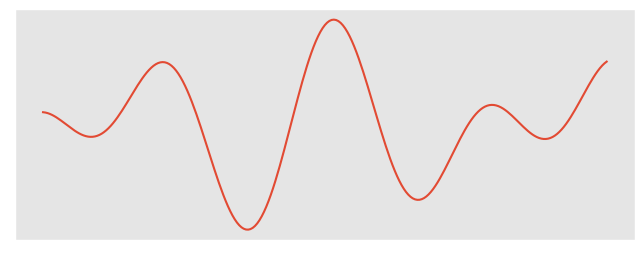

In [267]:
t_min, t_max = 0, 0.25
t_indx = np.logical_and(time>=t_min, time<=t_max)
plt.plot(time[t_indx], time_history[t_indx])
plt.gca().set_xticks([])
plt.gca().set_yticks([])

#plt.savefig('sampling_signal.pdf', bbox_inches='tight')

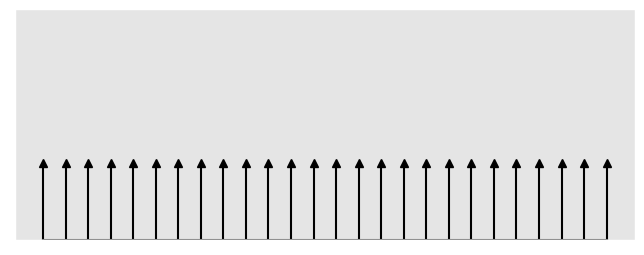

In [269]:
# enotski impulzi

delta_t = 0.01 
delta_t_indx = int(delta_t*fs)
delta_train = np.ones_like(time_history[::delta_t_indx])

delta_train_indx = np.logical_and(time[::delta_t_indx]>=t_min, time[::delta_t_indx]<=t_max)

plt.stem(time[::delta_t_indx][delta_train_indx], delta_train[delta_train_indx], linefmt='k', markerfmt='^k')
#plt.plot(time[t_indx], time_history[t_indx]);
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.ylim(0,3)

#plt.savefig('sampling_train_delta.pdf', bbox_inches='tight')

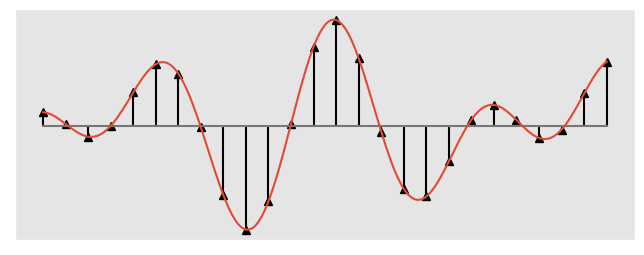

In [270]:
plt.stem(time[::delta_t_indx][delta_train_indx], time_history[::delta_t_indx][delta_train_indx], linefmt='k', markerfmt='^k');
plt.plot(time[t_indx], time_history[t_indx]);
plt.gca().set_xticks([])
plt.gca().set_yticks([])

#plt.savefig('sampling_result.pdf', bbox_inches='tight')

# AA filter

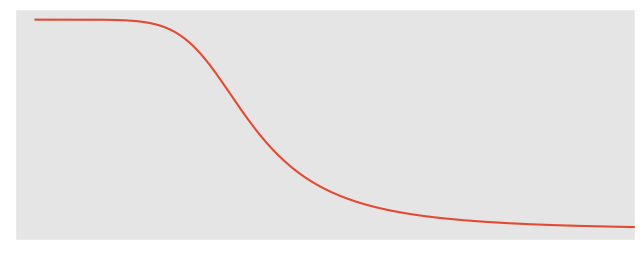

In [278]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)

plt.plot(w, np.abs(h))
plt.xlim(0,300)

plt.gca().set_xticks([])
plt.gca().set_yticks([])

#plt.savefig('AA_filter_characteristics.pdf', bbox_inches='tight')

## Sample and Hold

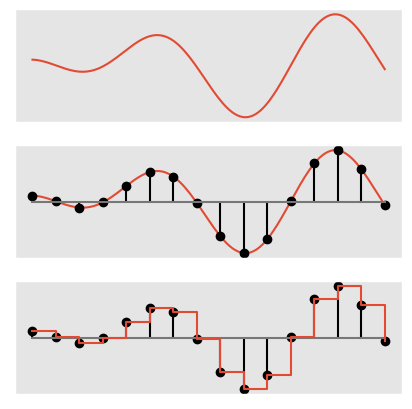

In [314]:
# signal
# narrowband signal

freq = np.arange(0,100,.1)
A = 1
f_lf, f_hf = 10,15
PSD = np.interp(freq, [f_lf, f_hf], [A,A], left=0, right=0)
T = 1
fs = 1e3
seed = 125
rg = np.random.default_rng(seed)
time, time_history = FLife.tools.random_gaussian(freq, PSD, T=T, fs=fs, rg=rg)

t_min, t_max = 0, 0.15
t_indx = np.logical_and(time>=t_min, time<=t_max)

fig, (ax1, ax2, ax3)  = plt.subplots(3,1, figsize=(5,5), sharex=True)

#signal
ax1.plot(time[t_indx], time_history[t_indx])
ax1.set_xticks([])
ax1.set_yticks([])

# sample
delta_t = 0.01 
delta_t_indx = int(delta_t*fs)
delta_train = np.ones_like(time_history[::delta_t_indx])
delta_train_indx = np.logical_and(time[::delta_t_indx]>=t_min, time[::delta_t_indx]<=t_max)

ax2.plot(time[t_indx], time_history[t_indx])
ax2.stem(time[::delta_t_indx][delta_train_indx], time_history[::delta_t_indx][delta_train_indx], linefmt='k', markerfmt='ok')
ax2.set_xticks([])
ax2.set_yticks([])

# hold
ax3.stem(time[::delta_t_indx][delta_train_indx], time_history[::delta_t_indx][delta_train_indx], linefmt='k', markerfmt='ok')
ax3.step(time[::delta_t_indx][delta_train_indx], time_history[::delta_t_indx][delta_train_indx], where='post');
#ax3.plot(time[t_indx], time_history[t_indx], alpha=.5)
ax3.set_xticks([])
ax3.set_yticks([])


#plt.savefig('sample_and_hold.pdf', bbox_inches='tight')

## Quantizer


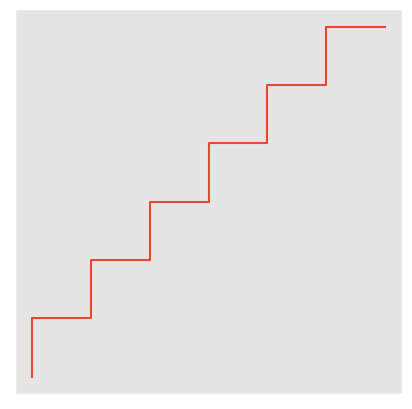

In [326]:
input_range = 3
x = np.arange(-input_range,input_range+1,1)
y = np.arange(-input_range,input_range+1,1)

plt.figure(figsize=(5,5))
plt.step(x,y)
plt.gca().set_xticks([])
plt.gca().set_yticks([])


#plt.savefig('ADC_quantization.pdf', bbox_inches='tight')

## Random variables- PDF, CDF

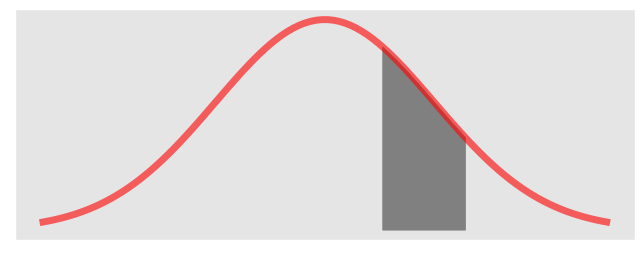

In [60]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.norm.ppf(0.005), stats.norm.ppf(0.995), 100)
ax.plot(x, stats.norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
x_sel = np.linspace(stats.norm.ppf(0.7), stats.norm.ppf(0.9), 100)
ax.fill_between(x_sel, stats.norm.pdf(x_sel), color='grey')

plt.gca().set_xticks([])
plt.gca().set_yticks([])
#plt.savefig('pdf_norm.pdf', bbox_inches='tight')

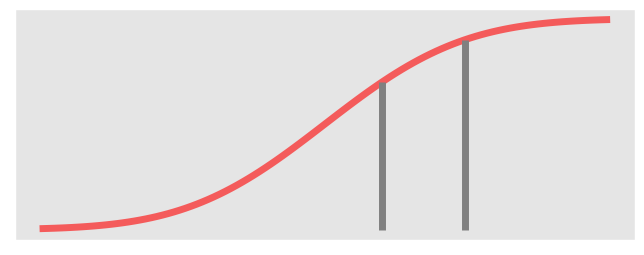

In [59]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.norm.ppf(0.005), stats.norm.ppf(0.995), 100)
ax.plot(x, stats.norm.cdf(x), 'r-', lw=5, alpha=0.6, label='norm cdf')
x_sel = stats.norm.ppf(0.7), stats.norm.ppf(0.9)
ax.vlines(x_sel, 0, stats.norm.cdf(x_sel), color='grey', lw=5)

plt.gca().set_xticks([])
plt.gca().set_yticks([])
#plt.savefig('cdf_norm.pdf', bbox_inches='tight')

## Fourierova vrsta



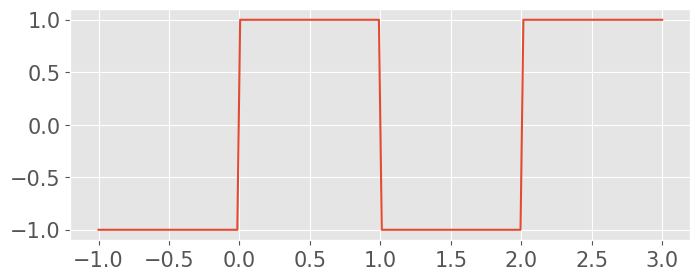

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# signal
T_p = 2
n = 200
x = np.ones(n)
x[:n//4] = -1.
x[n//4:2*n//4] = 1.
x[2*n//4:3*n//4] = -1.
x[3*n//4:n] = 1.

t = np.arange(n)*2*T_p/(n-1) - T_p/2
dt = t[1]-t[0]

plt.plot(t,x)

<StemContainer object of 3 artists>

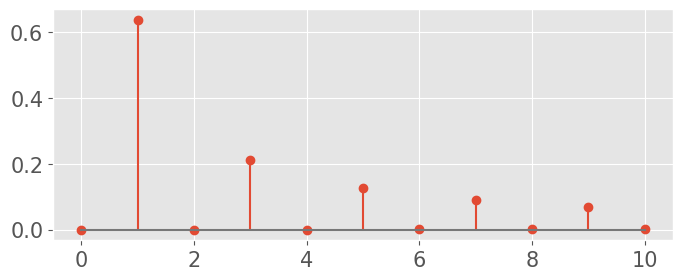

In [111]:
# Fourierove vrste
N = 10
c = np.zeros(2*N+1, dtype='complex')
n = np.arange(-N,N+1)

#omejiti se moramo samo na eno periodo, sicer koeficienti niso pravilno izračunani
sel = np.logical_and(t>=0,t<=T_p) 

for i in n:
    c[i+N] = np.trapz(x[sel]*np.exp(-2j*np.pi*i*t[sel]/T_p), dx=dt)/T_p

sel = np.abs(c) 
plt.stem(np.abs(c[int((len(c)-1)/2):]))

In [124]:
# rekonstrukcija
x_r = np.zeros((N,len(t)), 'complex')


for _ in range(-N,N+1):
    x_r += c[N+_]*np.exp(2j*np.pi*_*t/T_p)
x_r = np.real(x_r) 



array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

<StemContainer object of 3 artists>

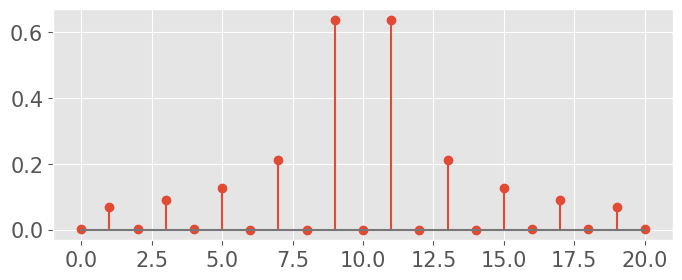

In [129]:
plt.stem(np.abs(c))

In [126]:
c[int((len(c)-1)/2):]

array([ 0.00000000e+00+0.00000000e+00j,  6.24500451e-17-6.36527232e-01j,
       -6.93889390e-18+3.96649155e-04j,  6.59194921e-17-2.11929286e-01j,
       -3.81639165e-17+7.93259458e-04j,  4.51028104e-17-1.26862832e-01j,
        1.17961196e-16+1.18979483e-03j,  3.08780779e-16-9.03023227e-02j,
       -1.70002901e-16+1.58622479e-03j, -3.12250226e-17-6.99121564e-02j,
       -2.77555756e-17+1.98252732e-03j])

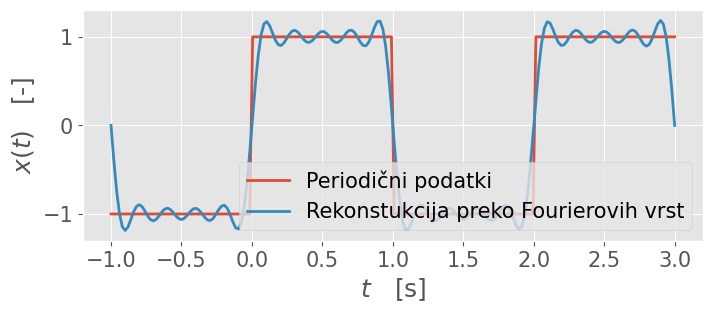

In [122]:

# rekonstrukcija
x_r = np.zeros(len(t), 'complex')
for _ in range(-N,N+1):
    x_r += c[N+_]*np.exp(2j*np.pi*_*t/T_p)
x_r = np.real(x_r) 


fig, ax1 = plt.subplots()

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\quad$[-]')
ax1.tick_params(axis='y')
ax1.plot(t, x, label='Periodični podatki', c='C0', lw=2, alpha=1) 
ax1.plot(t, x_r, label='Rekonstukcija preko Fourierovih vrst', c='C1', lw=2, alpha=1) 
ax1.legend(loc=4)
plt.show()